### Test task: Text Classification
#### Load libs and modules

In [1]:
# get libs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# custom modules
from src.preprocess import preprocessing            # load dataset and show classes balance
from src.embedding import embeddings                # form embeddings for each object in dataset and show cluster assessment
from src.metrics import metric                      # get accuracy, f1-score, confusuin matrix
from src.train import train                         # set of modeles for train

#### Get data and reveal class balance

Мир                136621
Экономика           79528
Спорт               64413
Культура            53797
Наука и техника     53136
Интернет и СМИ      44663
Name: topic, dtype: int64


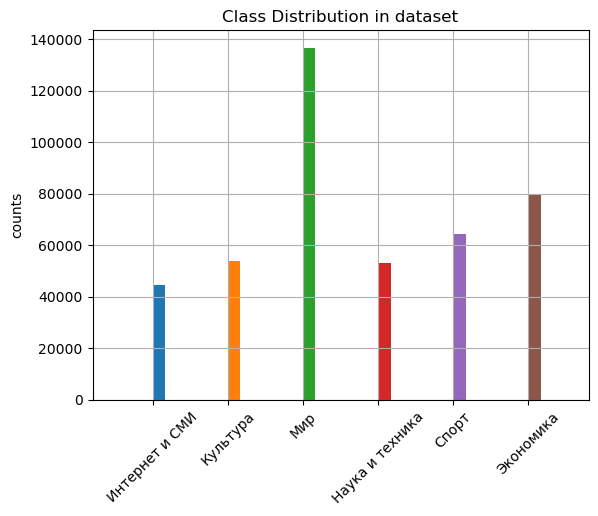

In [2]:
# get data
path = 'data/test.csv'
raw_data = preprocessing(path)

#### Show instance in dataset

In [3]:
# examples
print('title:\n', format(raw_data['title'][0]),
      '\ntext:\n', format(raw_data['text'][0]),
      '\ntopic:\n', format(raw_data['topic'][0]))

title:
 Британцы отмечают двухлетие смерти Дианы 
text:
 Британцы отмечают сегодня скорбную дату - вторуюгодовщину со дня смерти принцессы Дианы. Она погибла вавтомобильной катастрофе в парижском туннеле в ранние утренниечасы 31 августа 1997 года. С утра к золоченым воротамКенсингтонского дворца, где жила Диана, приходят ее поклонники.В чугунные завитки ограды вплетаются сотни букетов. Людиоставляют дары принцессе - коробки конфет, плюшевых мишек,открытки со посвященными ей стихами, стенгазеты. Вчера и сегодня болееТысячи англичан подписали петицию с требованием к властямускорить сооружение мемориала принцессе. Пока Мемориальныйкомитет собирается переоборудовать в ее честь детскую игровуюплощадку, которая находится на территории Кенсингтонского паркаи создать посвященную ей "прогулочную дорожку" вдоль похоронного маршрута. Мемориальный фонд имени принцессы Дианы собрал в видепожертвований населения более 85 миллонов фунтов (140 миллионов долларов).Средичленов правления фонда нет соглас

#### Extract features by applying embeddings and split dataset to train and test. Here 'get_projection' is bool param that allows you get 2d projection of features for classes distribution assessment 

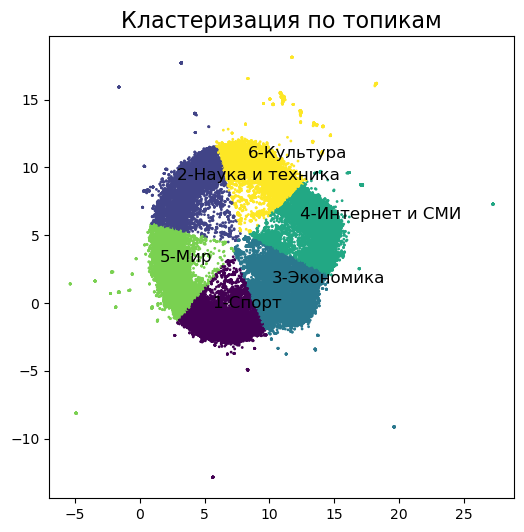

((302510, 512), (129648, 512), (302510,), (129648,))

In [4]:
# split to train and test data
text_embeddings, target = embeddings(raw_data, max_f = 512, get_projection = True)   # max_f can be various and tuned after training models

X_train, X_test, y_train, y_test = train_test_split(text_embeddings, target, test_size = 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

#### Load ML models and train (random forest, decision tree, log regression). In a previous step we got clustering result by kmeans that shows us the features can not be separated properly with linear models due to close distance between classes. In cunclision, we get the best proposed model

In [5]:
# Fit all models
models_dict = train(X_train, y_train)

Decision Tree is started
Random Forest is started
Logistic Regression is started
done!


#### build metrics for each trained models

build metric for: Decision_Tree
Accuracy: Decision Decision_Tree is 0.643
f1-score: Decision_Tree is 0.607


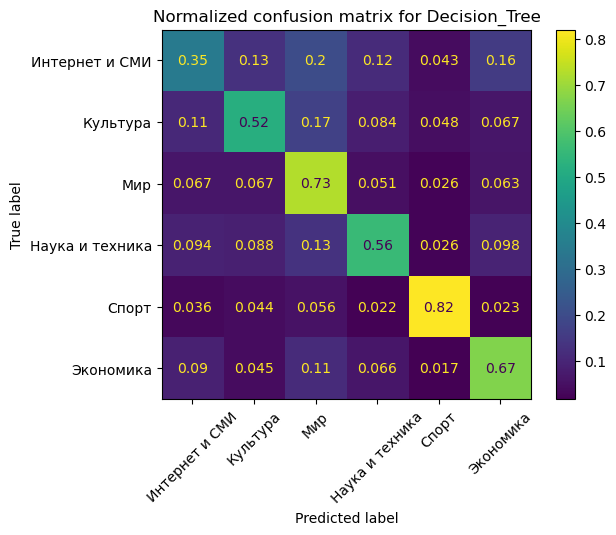

build metric for: Randon_Forest
Accuracy: Decision Randon_Forest is 0.775
f1-score: Randon_Forest is 0.736


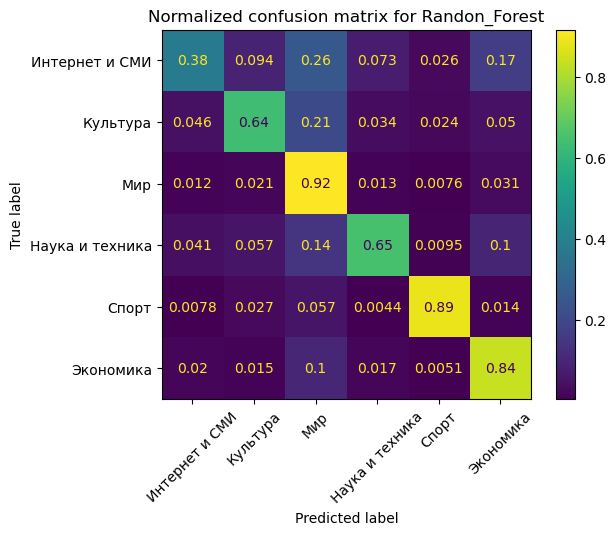

build metric for: Logistic Regression
Accuracy: Decision Logistic Regression is 0.799
f1-score: Logistic Regression is 0.77


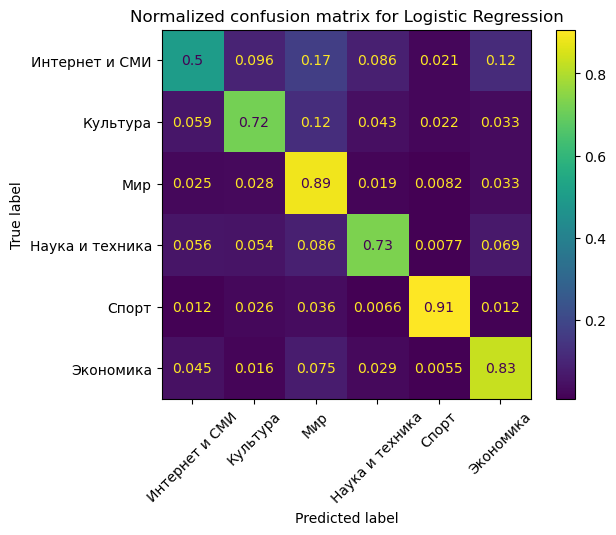

In [6]:
# build metrics: accuracy, f1-score, confusion matrix
for key,itm in models_dict.items():
    print(f'build metric for: {key}')
    metric(itm, X_test, y_test, key)

#### Alternative way: training Gradient Boosting

In [7]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

model_gb = GradientBoostingClassifier(
    n_iter_no_change = 3,
    verbose = 1,
    loss = 'log_loss',
    learning_rate = 1.0,
    n_estimators = 10,
    max_depth = 3, 
    random_state = 0,
    tol = 0.01).fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1660            9.27m
         2           1.0112            8.27m
         3           0.9284            7.25m
         4           0.8757            6.22m
         5           0.8415            5.19m
         6           0.8135            4.11m
         7           0.7931            3.06m
         8           0.7769            2.03m
         9           0.7621            1.01m
        10           0.7493            0.00s


build metric for: gradient boosting
Accuracy: Decision Gradient Boosting is 0.74
f1-score: Gradient Boosting is 0.705


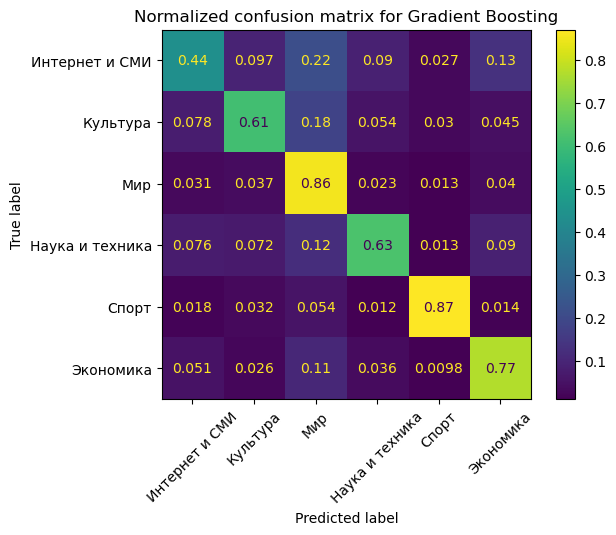

In [8]:
# get metrics
print(f'build metric for: gradient boosting')
metric(model_gb, X_test, y_test, model_name='Gradient Boosting')

##### the best model is log regression